In [1]:
import tensorflow as tf 
from tensorflow.keras import layers, models 
import matplotlib.pyplot as plt 
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import datetime
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-04-02 19:45:27.185411: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
!pip install tensorflow_hub

In [2]:
train_dir = './train'
validation_dir = './validation'
batch_size = 100
img_height = 224
img_width = 224
target_size = (224, 224)

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3057 files belonging to 16 classes.
Using 2446 files for training.


2023-04-02 19:53:58.501544: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  validation_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 758 files belonging to 16 classes.
Using 151 files for validation.


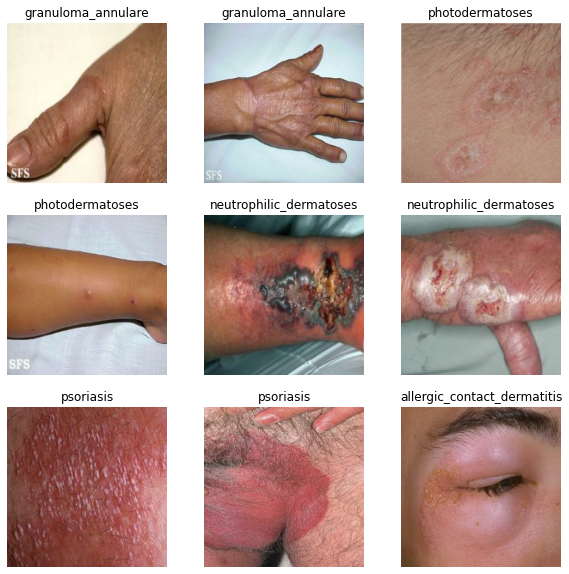

In [7]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds:
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Data Augmentation

In [5]:
IMG_SIZE = 224

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2)
])



# Custom CNN

In [7]:
from tensorflow.keras.models import Sequential

num_classes = len(class_names)

model = Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (7,7), activation='relu', input_shape=(img_width, img_height, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(8, (2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(300, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(num_classes, activation='Softmax')
])



In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
epochs = 10

history = model.fit(
  train_ds,
  epochs=epochs,
  validation_data=val_ds
)

Epoch 1/10


/Users/eliasdzobo/opt/anaconda3/lib/python3.9/site-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


25/25 [==============================] - 89s 3s/step - loss: 2.6177 - accuracy: 0.1410 - val_loss: 2.5277 - val_accuracy: 0.1258
Epoch 2/10
25/25 [==============================] - 83s 3s/step - loss: 2.5544 - accuracy: 0.1468 - val_loss: 2.5470 - val_accuracy: 0.1258
Epoch 3/10
25/25 [==============================] - 82s 3s/step - loss: 2.5457 - accuracy: 0.1643 - val_loss: 2.5275 - val_accuracy: 0.1258
Epoch 4/10
25/25 [==============================] - 150s 6s/step - loss: 2.5363 - accuracy: 0.1652 - val_loss: 2.5293 - val_accuracy: 0.1391
Epoch 5/10
25/25 [==============================] - 83s 3s/step - loss: 2.5299 - accuracy: 0.1545 - val_loss: 2.5189 - val_accuracy: 0.1325
Epoch 6/10
25/25 [==============================] - 702s 29s/step - loss: 2.5109 - accuracy: 0.1611 - val_loss: 2.5035 - val_accuracy: 0.1325
Epoch 7/10
25/25 [==============================] - 575s 24s/step - loss: 2.4900 - accuracy: 0.1721 - val_loss: 2.4635 - val_accuracy: 0.1457
Epoch 8/10
25/25 [========

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 218, 218, 32)      4736      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 109, 109, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 105, 105, 16)      12816     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 52, 52, 16)       0         
 2D)                                                  

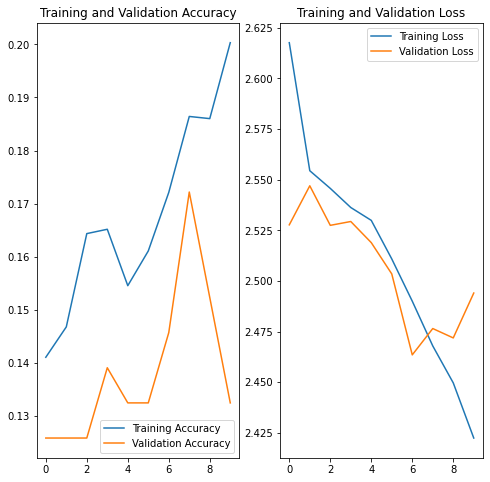

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# CropNet

In [14]:
cropnet = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"


feature_extractor_layer = hub.KerasLayer(
    cropnet,
    input_shape=(224, 224, 3),
    trainable=False 
    )

In [15]:


classifier = tf.keras.Sequential([
    feature_extractor_layer,
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])




Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [16]:
classifier.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

In [17]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1) # Enable histogram computation for every epoch.

In [18]:
NUM_EPOCHS = 50

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=NUM_EPOCHS,
                    callbacks=tensorboard_callback)

Epoch 1/50
25/25 [==============================] - 119s 5s/step - loss: 2.4350 - accuracy: 0.1864 - val_loss: 2.4766 - val_accuracy: 0.1722
Epoch 2/50
25/25 [==============================] - 113s 4s/step - loss: 2.3942 - accuracy: 0.2032 - val_loss: 2.4498 - val_accuracy: 0.1722
Epoch 3/50
25/25 [==============================] - 154s 6s/step - loss: 2.3788 - accuracy: 0.2052 - val_loss: 2.4884 - val_accuracy: 0.1192
Epoch 4/50
25/25 [==============================] - 159s 6s/step - loss: 2.3377 - accuracy: 0.2183 - val_loss: 2.5016 - val_accuracy: 0.1126
Epoch 5/50
25/25 [==============================] - 195s 8s/step - loss: 2.3167 - accuracy: 0.2281 - val_loss: 2.4671 - val_accuracy: 0.1854
Epoch 6/50
25/25 [==============================] - 442s 18s/step - loss: 2.2730 - accuracy: 0.2388 - val_loss: 2.4328 - val_accuracy: 0.1391
Epoch 7/50
25/25 [==============================] - 136s 5s/step - loss: 2.2841 - accuracy: 0.2367 - val_loss: 2.4451 - val_accuracy: 0.1722
Epoch 8/50
2

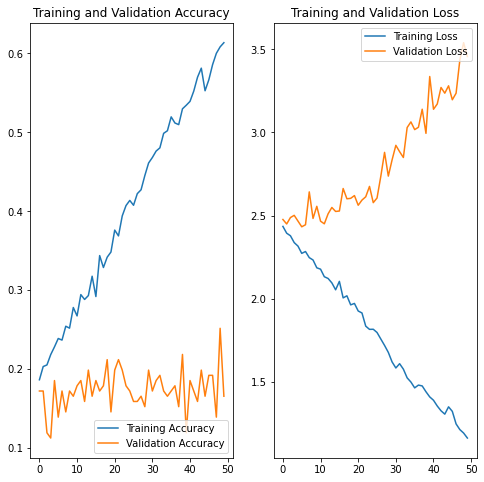

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(NUM_EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save('overfitted_model.pd') 

# Custom Model

In [8]:
test_model = models.Sequential()
test_model.add(resize_and_rescale)
test_model.add(data_augmentation)
test_model.add(layers.Conv2D(32, (3, 3), activation='relu'))
test_model.add(layers.MaxPooling2D((2, 2)))
test_model.add(layers.Dropout(0.4))
test_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
test_model.add(layers.MaxPooling2D((2, 2)))
test_model.add(layers.Flatten())
test_model.add(layers.Dropout(0.2))
test_model.add(layers.Dense(64, activation='relu'))
test_model.add(layers.Dense(len(class_names)))

In [9]:
test_model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [10]:
NUM_EPOCHS = 50

history = test_model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=NUM_EPOCHS
                    )

Epoch 1/50
25/25 [==============================] - 69s 3s/step - loss: 6.3325 - accuracy: 0.1124 - val_loss: 2.7399 - val_accuracy: 0.1258
Epoch 2/50
25/25 [==============================] - 91s 4s/step - loss: 2.6199 - accuracy: 0.0977 - val_loss: 2.6431 - val_accuracy: 0.0795
Epoch 3/50
25/25 [==============================] - 85s 3s/step - loss: 2.6032 - accuracy: 0.1460 - val_loss: 2.6283 - val_accuracy: 0.1192
Epoch 4/50
25/25 [==============================] - 71s 3s/step - loss: 2.5856 - accuracy: 0.1345 - val_loss: 2.6582 - val_accuracy: 0.1258
Epoch 5/50
25/25 [==============================] - 78s 3s/step - loss: 2.5656 - accuracy: 0.1643 - val_loss: 2.6039 - val_accuracy: 0.1258
Epoch 6/50
25/25 [==============================] - 75s 3s/step - loss: 2.5431 - accuracy: 0.1635 - val_loss: 2.6302 - val_accuracy: 0.1258
Epoch 7/50
25/25 [==============================] - 81s 3s/step - loss: 2.5364 - accuracy: 0.1623 - val_loss: 2.5745 - val_accuracy: 0.1258
Epoch 8/50
25/25 [==

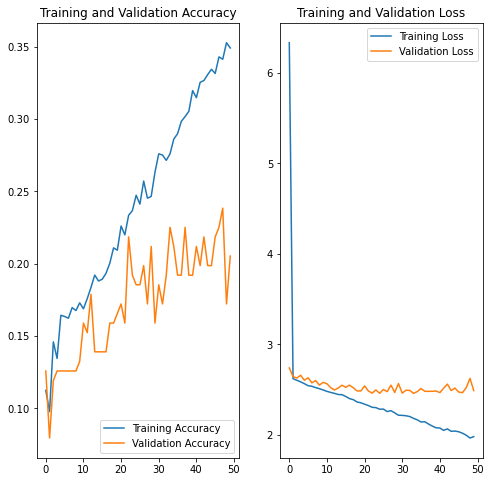

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(NUM_EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Threshold Data 